# Fitting a Sum of Gaussian Curves

In this example, we use `HistogramGMM` to fit a sum of 4 1-dimensional gaussians.

In [75]:
import numpy as np
import matplotlib.pyplot as plt

from histgmm import HistogramGMM
from histgmm.utils import gaussian_1d
from histgmm.visualization import plot_1d_gaussian_fit

## Data
We construct below a histogram that is composed of the sum of three gaussian curves over a space going from 0 to 99.

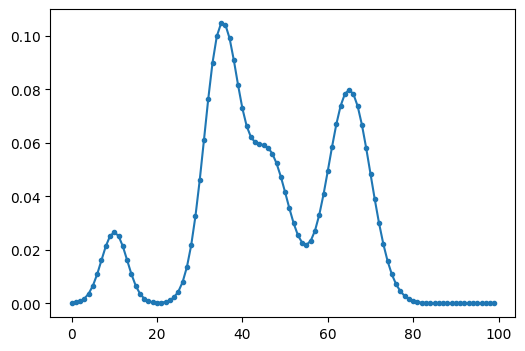

In [76]:
x = np.arange(0, 100, 1)
h = gaussian_1d(x, A=0.2, mu=10, var=9) + \
    gaussian_1d(x, A=1, mu=35, var=16) + \
    gaussian_1d(x, A=0.7, mu=46, var=25) + \
    gaussian_1d(x, A=1, mu=65, var=25)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, h, marker='.')

## Model

The HistogramGMM class can be used to fit the gaussian curves above using EM.

In [77]:
n_components = 4
model = HistogramGMM(n_components=n_components)
model.fit(x.reshape(-1, 1), h)

for k in range(n_components):
    print("Component {} -- Mean: {:.2f} Var: {:.2f} Weight: {:.4f}".format(
        k, float(model.means_[k].squeeze()), float(model.covariances_[k].squeeze()), float(model.weights_[k].squeeze())
    ))

Component 0 -- Mean: 10.00 Var: 8.97 Weight: 0.0690
Component 1 -- Mean: 34.94 Var: 15.87 Weight: 0.3378
Component 2 -- Mean: 45.87 Var: 27.24 Weight: 0.2506
Component 3 -- Mean: 65.06 Var: 24.60 Weight: 0.3426


## Visualization

Below we use an utility function to plot the resulting gaussians scaled to fit the histogram.
The original curve is shown in the second figure as a scattered plot, with the continuous gaussian curves plotted above it and colored by their component.

Text(0.5, 1.0, 'Fitted and Scaled Gaussians')

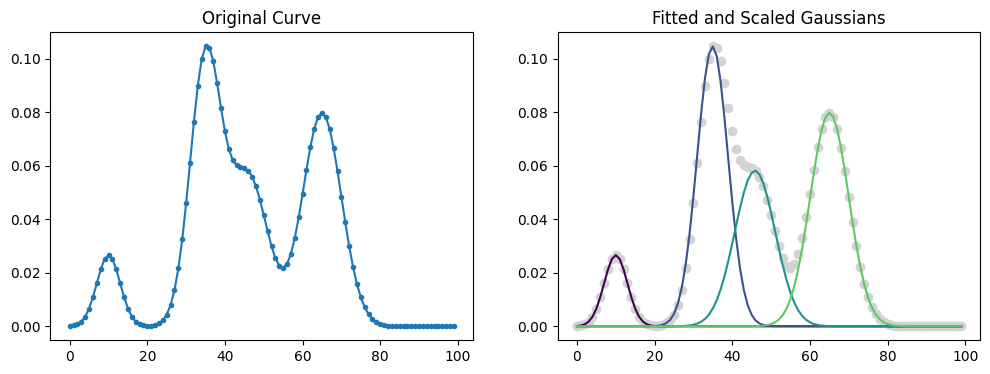

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(x, h, marker='.')
ax[0].set_title('Original Curve')
plot_1d_gaussian_fit(gmm=model, X=x.reshape(-1, 1), h=h, ax=ax[1])
ax[1].set_title('Fitted and Scaled Gaussians')